In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,State,Marketing Spend,Profit
0,New York,471784.10,192261.83
1,California,443898.53,191792.06
2,Florida,407934.54,191050.39
3,New York,383199.62,182901.99
4,Florida,366168.42,166187.94


In [3]:
x, y = dataset.iloc[:, 1:-1].values, dataset.iloc[:, -1].values

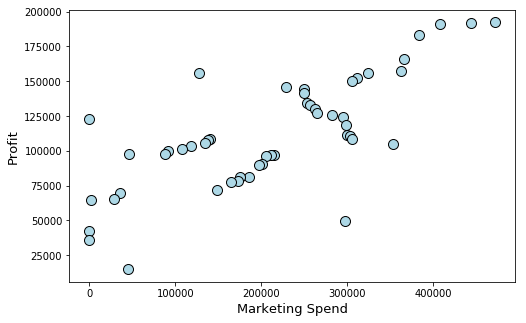

In [4]:
plt.figure(figsize = (8, 5))

plt.xlabel(s = "Marketing Spend", fontsize = 13)
plt.ylabel(s = "Profit", fontsize = 13)

plt.plot(
    x, y,
    marker = 'o',
    markersize = 10,
    markeredgecolor = "black",
    color = "lightblue",
    linestyle = ''
)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [7]:
# Predicting the Test set results
ypredicted = regressor.predict(xtest)

# model accuracy
print("Accuracy = {0:0.0f}%".format(regressor.score(xtest, ytest) * 100))

Accuracy = 37%


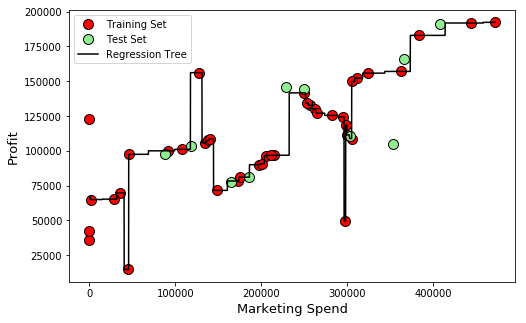

In [8]:
# Visualising the Decision Tree Regression results

arr = np.arange(x.min(), x.max(), 0.1)
arr = arr.reshape(len(arr), 1)

plt.figure(figsize = (8, 5))

plt.xlabel(s = "Marketing Spend", fontsize = 13)
plt.ylabel(s = "Profit", fontsize = 13)

plt.plot(
    xtrain, ytrain,
    marker = 'o',
    markersize = 10,
    markeredgecolor = "black",
    color = "red",
    linestyle = '',
    label = "Training Set"
)

plt.plot(
    xtest, ytest,
    marker = 'o',
    markersize = 10,
    markeredgecolor = "black",
    color = "lightgreen",
    linestyle = '',
    label = "Test Set"
)

plt.plot(
    arr, regressor.predict(arr),
    color = "black",
    linestyle = '-',
    label = "Regression Tree"
)

plt.legend()